169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Train: (40000, 32, 32, 3), Val: (10000, 32, 32, 3), Test: (10000, 32, 32, 3)


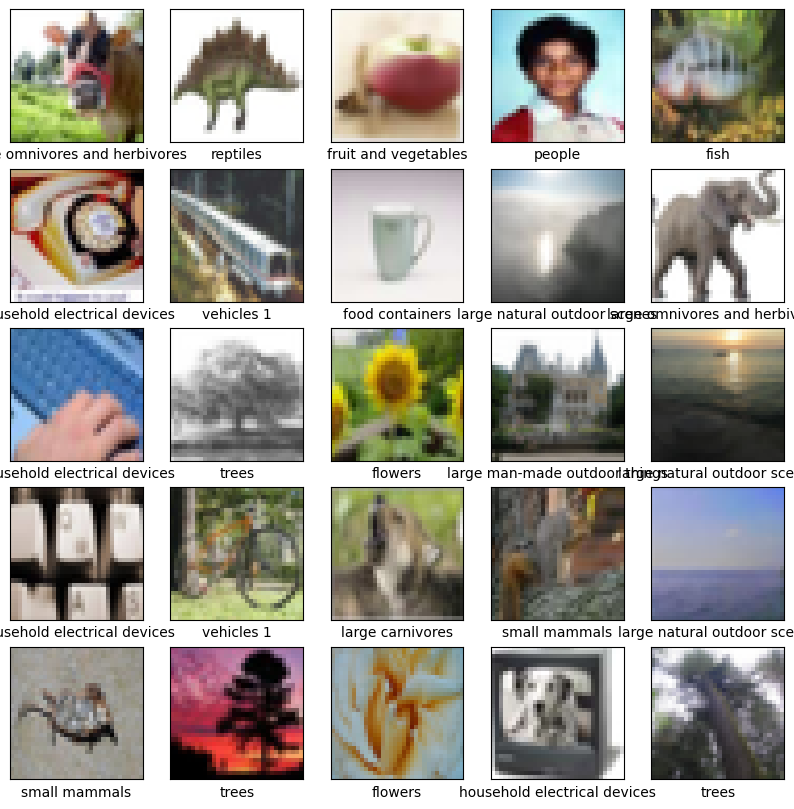

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers, callbacks
import numpy as np
import matplotlib.pyplot as plt

# Завантаження CIFAR-100 (20 суперкласів - coarse)
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data(label_mode='coarse')

# Нормалізація
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Train/Val/Test (40k / 10k / 10k)
x_val, y_val = x_train[-10000:], y_train[-10000:]
x_train, y_train = x_train[:-10000], y_train[:-10000]

print(f"Train: {x_train.shape}, Val: {x_val.shape}, Test: {x_test.shape}")

n_classes = 20

# Функція для побудови графіків
def plot_history(hist, title):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(hist.history['loss'], label='train loss')
    plt.plot(hist.history['val_loss'], label='val loss')
    plt.title('Loss'); plt.legend()
    plt.subplot(1,2,2)
    plt.plot(hist.history['accuracy'], label='train acc')
    plt.plot(hist.history['val_accuracy'], label='val acc')
    plt.title('Accuracy'); plt.legend()
    plt.suptitle(title)
    plt.show()

# Визначаємо назви суперкласів (20 класів)
super_classes = ['aquatic mammals', 'fish', 'flowers', 'food containers', 'fruit and vegetables',
                 'household electrical devices', 'household furniture', 'insects', 'large carnivores',
                 'large man-made outdoor things', 'large natural outdoor scenes', 'large omnivores and herbivores',
                 'medium-sized mammals', 'non-insect invertebrates', 'people', 'reptiles', 'small mammals',
                 'trees', 'vehicles 1', 'vehicles 2']

# Відображення перших 25 зображень
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Відображаємо зображення
    plt.imshow(x_train[i])
    # Виводимо назву класу
    plt.xlabel(super_classes[y_train[i][0]])
plt.show()

In [ ]:
data_augmentation = keras.Sequential(
    [
        # Випадково перевертає зображення по горизонталі
        layers.RandomFlip("horizontal"),
        # Випадково обертає зображення на невеликий кут
        layers.RandomRotation(0.2),
        # Випадково наближує або віддаляє зображення
        layers.RandomZoom(0.2),
        # Випадково зсуває зображення по горизонталі та вертикалі
        layers.RandomTranslation(0.2, 0.2),
        layers.RandomContrast(0.15)
    ]
)

In [ ]:
# Навчання моделей
def train_model2(model, epochs=50, batch_size=64):
    model.compile(
        optimizer=keras.optimizers.Adam(5e-4),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    cb = [
         callbacks.EarlyStopping(patience=6, restore_best_weights=True),
         callbacks.ReduceLROnPlateau(factor=0.3, patience=3, min_lr=1e-6)
    ]
    history = model.fit(
        x_train, y_train,
        validation_data=(x_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=cb,
        verbose=2
    )
    return history

# CNN: з регуляризацією (Dropout + L2 + BN)
def build_cnn_reg2(input_shape=(32,32,3), n_classes=20, l2=5e-4, dropout=0.4):
    inputs = keras.Input(shape=input_shape)
    x = data_augmentation(inputs)
    for filters in [64,128,256]:
        x = layers.Conv2D(filters, (3,3), padding='same', kernel_regularizer=regularizers.l2(l2))(x)
        x = layers.ReLU()(x)
        x = layers.Conv2D(filters, (3,3), padding='same', kernel_regularizer=regularizers.l2(l2))(x)
        x = layers.ReLU()(x)
        x = layers.BatchNormalization()(x)
        x = layers.MaxPooling2D((2,2))(x)
        x = layers.Dropout(dropout)(x)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l2))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l2))(x)
    outputs = layers.Dense(n_classes, activation='softmax')(x)
    return keras.Model(inputs, outputs, name="CNN_reg")

Train: (40000, 32, 32, 3), Val: (10000, 32, 32, 3), Test: (10000, 32, 32, 3)


Epoch 1/50
625/625 - 22s - 34ms/step - accuracy: 0.1490 - loss: 3.6113 - val_accuracy: 0.1573 - val_loss: 3.2850 - learning_rate: 5.0000e-04
Epoch 2/50
625/625 - 20s - 31ms/step - accuracy: 0.2070 - loss: 3.1967 - val_accuracy: 0.2868 - val_loss: 2.8536 - learning_rate: 5.0000e-04
Epoch 3/50
625/625 - 21s - 33ms/step - accuracy: 0.2423 - loss: 2.9770 - val_accuracy: 0.3093 - val_loss: 2.7462 - learning_rate: 5.0000e-04
Epoch 4/50
625/625 - 21s - 33ms/step - accuracy: 0.2699 - loss: 2.8091 - val_accuracy: 0.3345 - val_loss: 2.5412 - learning_rate: 5.0000e-04
Epoch 5/50
625/625 - 20s - 32ms/step - accuracy: 0.2879 - loss: 2.6908 - val_accuracy: 0.3135 - val_loss: 2.5603 - learning_rate: 5.0000e-04
Epoch 6/50
625/625 - 21s - 33ms/step - accuracy: 0.3054 - loss: 2.5896 - val_accuracy: 0.3360 - val_loss: 2.4660 - learning_rate: 5.0000e-04
Epoch 7/50
625/625 - 21s - 33ms/step - accuracy: 0.3188 - loss: 2.5174 - val_accuracy: 0.2972 - val_loss: 2.7575 - learning_rate: 5.0000e-04
Epoch 8/50
62

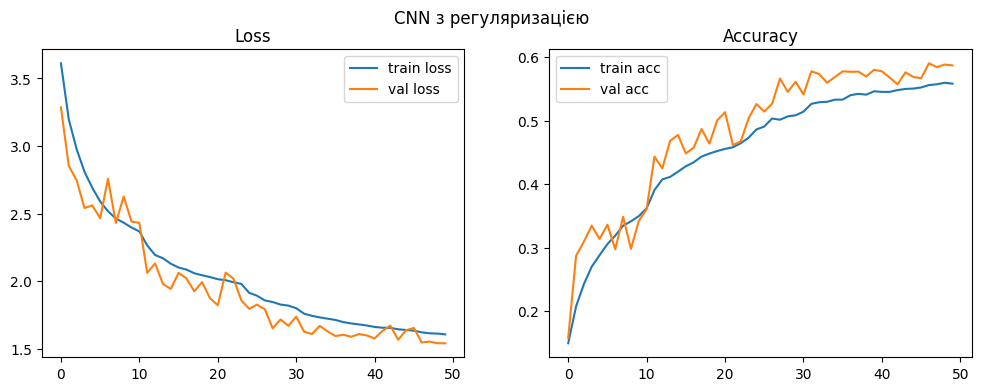

CNN з рег:
[1.520179271697998, 0.5924000144004822]


In [ ]:
cnn_reg2 = build_cnn_reg2()
hist_cnn_reg2 = train_model2(cnn_reg2)
plot_history(hist_cnn_reg2, "CNN з регуляризацією")
print("CNN з рег:")
print(cnn_reg2.evaluate(x_test, y_test, verbose=0))

In [ ]:
def resize_images(x, size=(64,64)):
    x_resized = tf.image.resize(x, size)
    return x_resized.numpy()

x_train_resized = resize_images(x_train)
x_val_resized   = resize_images(x_val)
x_test_resized  = resize_images(x_test)

In [ ]:
# Навчання моделей
def train_model(model, epochs=50, batch_size=64):
    model.compile(
        optimizer=keras.optimizers.Adam(5e-4),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    cb = [
        #  callbacks.EarlyStopping(patience=6, restore_best_weights=True),
         callbacks.ReduceLROnPlateau(factor=0.3, patience=3, min_lr=1e-6)
    ]
    history = model.fit(
        x_train_resized, y_train,
        validation_data=(x_val_resized, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=cb,
        verbose=2
    )
    return history

Epoch 1/50
625/625 - 29s - 47ms/step - accuracy: 0.1778 - loss: 2.6994 - val_accuracy: 0.1547 - val_loss: 2.7371
Epoch 2/50
625/625 - 12s - 19ms/step - accuracy: 0.2438 - loss: 2.4534 - val_accuracy: 0.2514 - val_loss: 2.4347
Epoch 3/50
625/625 - 12s - 19ms/step - accuracy: 0.2840 - loss: 2.3166 - val_accuracy: 0.2449 - val_loss: 2.5036
Epoch 4/50
625/625 - 12s - 19ms/step - accuracy: 0.3167 - loss: 2.2008 - val_accuracy: 0.2603 - val_loss: 2.4538
Epoch 5/50
625/625 - 21s - 34ms/step - accuracy: 0.3390 - loss: 2.1199 - val_accuracy: 0.3151 - val_loss: 2.2295
Epoch 6/50
625/625 - 20s - 32ms/step - accuracy: 0.3616 - loss: 2.0565 - val_accuracy: 0.2746 - val_loss: 2.4056
Epoch 7/50
625/625 - 12s - 19ms/step - accuracy: 0.3695 - loss: 2.0041 - val_accuracy: 0.3318 - val_loss: 2.2058
Epoch 8/50
625/625 - 20s - 33ms/step - accuracy: 0.3870 - loss: 1.9555 - val_accuracy: 0.3867 - val_loss: 1.9801
Epoch 9/50
625/625 - 12s - 19ms/step - accuracy: 0.3977 - loss: 1.9217 - val_accuracy: 0.3508 - 

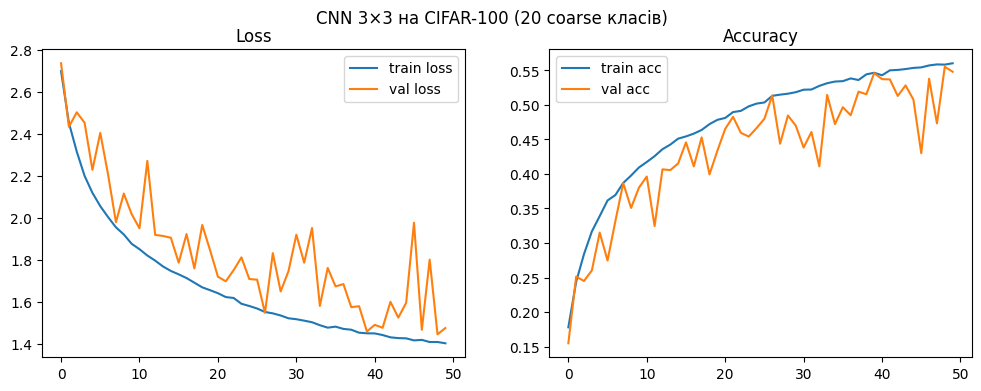

Оцінка на тесті:
313/313 - 2s - 7ms/step - accuracy: 0.5462 - loss: 1.4873
[1.4872721433639526, 0.5461999773979187]


In [ ]:
# Сама модель з 3×3 згортками
def build_cnn_3x3(input_shape=(64,64,3), n_classes=20, l2=1e-4, dropout_rate=0.3):
    inputs = keras.Input(shape=input_shape)
    x = inputs

    for filters in [32,64,128]:
        x = layers.Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(l2))(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(l2))(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.MaxPooling2D((2,2))(x)
        x = layers.Dropout(dropout_rate)(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l2))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l2))(x)
    outputs = layers.Dense(n_classes, activation='softmax')(x)

    model = keras.Model(inputs, outputs, name="cnn_3x3_cifar100")
    return model

# Побудова, навчання, оцінка
model = build_cnn_3x3()
history = train_model(model, epochs=50, batch_size=64)

plot_history(history, "CNN 3×3 на CIFAR-100 (20 coarse класів)")
model.save("my_model")
print("Оцінка на тесті:")
print(model.evaluate(x_test_resized, y_test, verbose=2))


Epoch 1/50
625/625 - 26s - 42ms/step - accuracy: 0.0989 - loss: 2.8405 - val_accuracy: 0.1366 - val_loss: 2.6923 - learning_rate: 5.0000e-04
Epoch 2/50
625/625 - 35s - 56ms/step - accuracy: 0.1564 - loss: 2.6684 - val_accuracy: 0.1778 - val_loss: 2.5871 - learning_rate: 5.0000e-04
Epoch 3/50
625/625 - 22s - 35ms/step - accuracy: 0.1944 - loss: 2.5668 - val_accuracy: 0.2453 - val_loss: 2.4284 - learning_rate: 5.0000e-04
Epoch 4/50
625/625 - 19s - 31ms/step - accuracy: 0.2274 - loss: 2.4827 - val_accuracy: 0.2666 - val_loss: 2.3452 - learning_rate: 5.0000e-04
Epoch 5/50
625/625 - 19s - 30ms/step - accuracy: 0.2434 - loss: 2.4285 - val_accuracy: 0.2705 - val_loss: 2.3237 - learning_rate: 5.0000e-04
Epoch 6/50
625/625 - 17s - 27ms/step - accuracy: 0.2588 - loss: 2.3801 - val_accuracy: 0.3042 - val_loss: 2.2345 - learning_rate: 5.0000e-04
Epoch 7/50
625/625 - 21s - 33ms/step - accuracy: 0.2716 - loss: 2.3392 - val_accuracy: 0.3230 - val_loss: 2.1782 - learning_rate: 5.0000e-04
Epoch 8/50
62

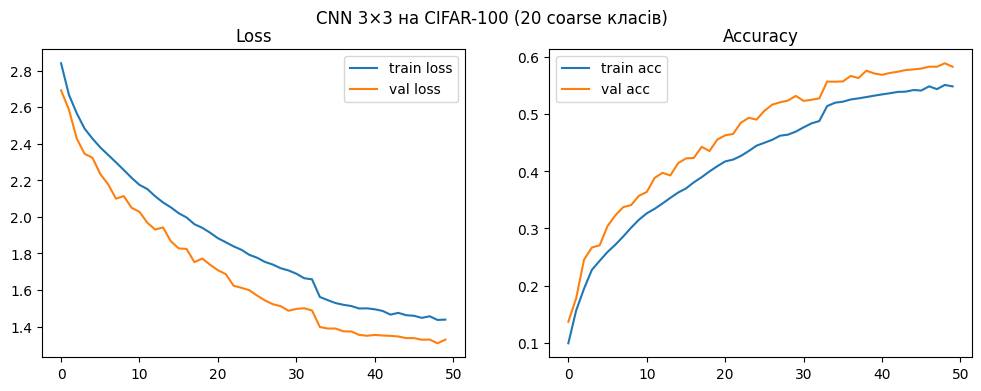

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=cnn_3x3.

In [ ]:
def cnn_3x3(input_shape=(64,64,3), n_classes=20):
    model = keras.Sequential([
        layers.Input(shape=input_shape),
        data_augmentation,

        # Block 1
        layers.Conv2D(32, (3,3), padding="same", activation="relu"),
        layers.Conv2D(32, (3,3), padding="same", activation="relu"),
        layers.MaxPooling2D((2,2)),

        # Block 2
        layers.Conv2D(64, (3,3), padding="same", activation="relu"),
        layers.Conv2D(64, (3,3), padding="same", activation="relu"),
        layers.MaxPooling2D((2,2)),

        # Block 3
        layers.Conv2D(128, (3,3), padding="same", activation="relu"),
        layers.Conv2D(128, (3,3), padding="same", activation="relu"),
        layers.MaxPooling2D((2,2)),

        # Block 4
        layers.Conv2D(256, (3,3), padding="same", activation="relu"),
        layers.Conv2D(256, (3,3), padding="same", activation="relu"),
        layers.GlobalAveragePooling2D(),

        # Classifier
        layers.Dropout(0.5),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(n_classes, activation="softmax")
    ])
    return model

# Побудова, навчання, оцінка
model = cnn_3x3()
history = train_model(model, epochs=50, batch_size=64)

plot_history(history, "CNN 3×3 на CIFAR-100 (20 coarse класів)")
model.save("cnn_3x3.h5")
print("Оцінка на тесті:")
print(model.evaluate(x_test_resized, y_test, verbose=2))


Epoch 1/100
625/625 - 14s - 22ms/step - accuracy: 0.1374 - loss: 2.7585 - val_accuracy: 0.2008 - val_loss: 2.5660 - learning_rate: 5.0000e-04
Epoch 2/100
625/625 - 7s - 11ms/step - accuracy: 0.2110 - loss: 2.5265 - val_accuracy: 0.2436 - val_loss: 2.4140 - learning_rate: 5.0000e-04
Epoch 3/100
625/625 - 10s - 16ms/step - accuracy: 0.2395 - loss: 2.4288 - val_accuracy: 0.2708 - val_loss: 2.3474 - learning_rate: 5.0000e-04
Epoch 4/100
625/625 - 7s - 11ms/step - accuracy: 0.2598 - loss: 2.3608 - val_accuracy: 0.2790 - val_loss: 2.2962 - learning_rate: 5.0000e-04
Epoch 5/100
625/625 - 7s - 12ms/step - accuracy: 0.2801 - loss: 2.3077 - val_accuracy: 0.3046 - val_loss: 2.2197 - learning_rate: 5.0000e-04
Epoch 6/100
625/625 - 10s - 16ms/step - accuracy: 0.2948 - loss: 2.2505 - val_accuracy: 0.3240 - val_loss: 2.1755 - learning_rate: 5.0000e-04
Epoch 7/100
625/625 - 7s - 11ms/step - accuracy: 0.3093 - loss: 2.2098 - val_accuracy: 0.3487 - val_loss: 2.1294 - learning_rate: 5.0000e-04
Epoch 8/10

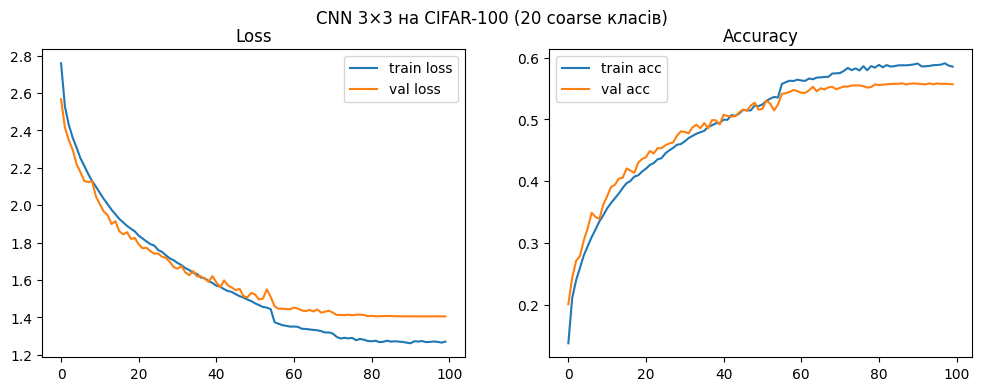

Оцінка на тесті:
313/313 - 1s - 4ms/step - accuracy: 0.5563 - loss: 1.3967
[1.3967046737670898, 0.5562999844551086]


In [ ]:
def build_light_cnn(input_shape=(64,64,3), n_classes=20):
    model = keras.Sequential([
        layers.Input(shape=input_shape),

        layers.Conv2D(32, (3,3), padding="same", activation="relu"),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(64, (3,3), padding="same", activation="relu"),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(128, (3,3), padding="same", activation="relu"),
        layers.MaxPooling2D(2,2),

        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(n_classes, activation="softmax")
    ])
    return model

# Побудова, навчання, оцінка
light_model = build_light_cnn()
history = train_model(light_model, epochs=100, batch_size=64)

plot_history(history, "CNN 3×3 на CIFAR-100 (20 coarse класів)")
light_model.save("light_cnn.h5")
print("Оцінка на тесті:")
print(light_model.evaluate(x_test_resized, y_test, verbose=2))

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers, models
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data(label_mode='coarse')

# Нормалізація
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Train/Val/Test (40k / 10k / 10k)
x_val, y_val = x_train[-10000:], y_train[-10000:]
x_train, y_train = x_train[:-10000], y_train[:-10000]

print(f"Train: {x_train.shape}, Val: {x_val.shape}, Test: {x_test.shape}")

n_classes = 20

# Функція для побудови графіків
def plot_history(hist, title):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(hist.history['loss'], label='train loss')
    plt.plot(hist.history['val_loss'], label='val loss')
    plt.title('Loss'); plt.legend()
    plt.subplot(1,2,2)
    plt.plot(hist.history['accuracy'], label='train acc')
    plt.plot(hist.history['val_accuracy'], label='val acc')
    plt.title('Accuracy'); plt.legend()
    plt.suptitle(title)
    plt.show()


# Функція для навчання моделей
def train_model(model, epochs=50, batch_size=64):
    model.compile(
        optimizer=keras.optimizers.Adam(5e-4),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    history = model.fit(
        x_train, y_train,
        validation_data=(x_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        verbose=verbose
    )
    return history

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Train: (40000, 32, 32, 3), Val: (10000, 32, 32, 3), Test: (10000, 32, 32, 3)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


=== Навчання CNN ===
Epoch 1/30
625/625 - 9s - 15ms/step - accuracy: 0.2220 - loss: 2.5259 - val_accuracy: 0.2962 - val_loss: 2.3080
Epoch 2/30
625/625 - 3s - 5ms/step - accuracy: 0.3476 - loss: 2.1212 - val_accuracy: 0.3598 - val_loss: 2.0570
Epoch 3/30
625/625 - 3s - 5ms/step - accuracy: 0.3990 - loss: 1.9434 - val_accuracy: 0.4084 - val_loss: 1.9238
Epoch 4/30
625/625 - 5s - 8ms/step - accuracy: 0.4372 - loss: 1.8212 - val_accuracy: 0.4319 - val_loss: 1.8392
Epoch 5/30
625/625 - 3s - 4ms/step - accuracy: 0.4663 - loss: 1.7150 - val_accuracy: 0.4561 - val_loss: 1.7597
Epoch 6/30
625/625 - 6s - 9ms/step - accuracy: 0.4949 - loss: 1.6306 - val_accuracy: 0.4667 - val_loss: 1.7476
Epoch 7/30
625/625 - 5s - 7ms/step - accuracy: 0.5170 - loss: 1.5481 - val_accuracy: 0.4826 - val_loss: 1.6765
Epoch 8/30
625/625 - 5s - 9ms/step - accuracy: 0.5378 - loss: 1.4773 - val_accuracy: 0.4869 - val_loss: 1.6620
Epoch 9/30
625/625 - 3s - 5ms/step - accuracy: 0.5580 - loss: 1.4133 - val_accuracy: 0.501

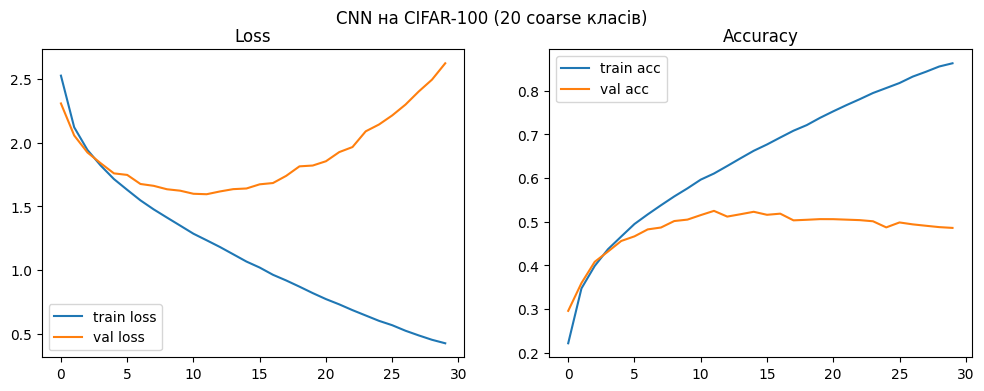

Оцінка CNN на тесті:
313/313 - 2s - 5ms/step - accuracy: 0.4873 - loss: 2.6128
[2.612780809402466, 0.48730000853538513]


In [ ]:
# CNN модель без рег
cnn_model_no_reg = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), padding="same", activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), padding="same", activation="relu"),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(n_classes, activation="softmax")
])

print("=== Навчання CNN ===")
hist_cnn = train_model(cnn_model_no_reg, epochs=30, batch_size=64)
plot_history(hist_cnn, "CNN на CIFAR-100 (20 coarse класів)")
cnn_model_no_reg.save('cnn_model_no_reg.keras')

print("Оцінка CNN на тесті:")
print(cnn_model_no_reg.evaluate(x_test, y_test, verbose=2))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


=== Навчання CNN ===
Epoch 1/30
625/625 - 9s - 15ms/step - accuracy: 0.1131 - loss: 2.8331 - val_accuracy: 0.1731 - val_loss: 2.6733
Epoch 2/30
625/625 - 5s - 8ms/step - accuracy: 0.1816 - loss: 2.6331 - val_accuracy: 0.2172 - val_loss: 2.5357
Epoch 3/30
625/625 - 6s - 10ms/step - accuracy: 0.2148 - loss: 2.5338 - val_accuracy: 0.2414 - val_loss: 2.4526
Epoch 4/30
625/625 - 4s - 7ms/step - accuracy: 0.2338 - loss: 2.4702 - val_accuracy: 0.2621 - val_loss: 2.3752
Epoch 5/30
625/625 - 6s - 10ms/step - accuracy: 0.2448 - loss: 2.4252 - val_accuracy: 0.2713 - val_loss: 2.3549
Epoch 6/30
625/625 - 4s - 7ms/step - accuracy: 0.2629 - loss: 2.3838 - val_accuracy: 0.2872 - val_loss: 2.2950
Epoch 7/30
625/625 - 5s - 8ms/step - accuracy: 0.2704 - loss: 2.3474 - val_accuracy: 0.3003 - val_loss: 2.2650
Epoch 8/30
625/625 - 5s - 8ms/step - accuracy: 0.2815 - loss: 2.3181 - val_accuracy: 0.3137 - val_loss: 2.2236
Epoch 9/30
625/625 - 3s - 5ms/step - accuracy: 0.2935 - loss: 2.2820 - val_accuracy: 0.3

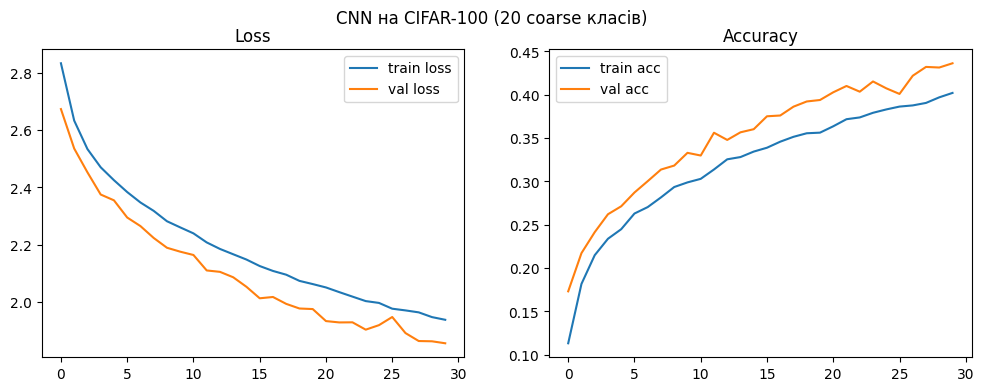

Оцінка CNN на тесті:
313/313 - 2s - 5ms/step - accuracy: 0.4349 - loss: 1.8453
[1.8453480005264282, 0.4348999857902527]


In [ ]:
# CNN модель з рег
cnn_model_reg = models.Sequential([
    layers.Conv2D(32, (3,3), padding="same", activation="relu",
                  kernel_regularizer=regularizers.l2(5e-5),
                  input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), padding="same", activation="relu",
                  kernel_regularizer=regularizers.l2(5e-5)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), padding="same", activation="relu",
                  kernel_regularizer=regularizers.l2(5e-5)),
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(5e-5)),
    layers.Dropout(0.2),
    layers.Dense(n_classes, activation="softmax")
])

print("=== Навчання CNN ===")
hist_cnn = train_model(cnn_model_reg, epochs=30, batch_size=64)
plot_history(hist_cnn, "CNN на CIFAR-100 (20 coarse класів)")
cnn_model_reg.save('cnn_model_reg.keras')

print("Оцінка CNN на тесті:")
print(cnn_model_reg.evaluate(x_test, y_test, verbose=2))

=== Навчання FNN ===
Epoch 1/50
625/625 - 4s - 7ms/step - accuracy: 0.1649 - loss: 2.6956 - val_accuracy: 0.2045 - val_loss: 2.5804
Epoch 2/50
625/625 - 3s - 6ms/step - accuracy: 0.2160 - loss: 2.5238 - val_accuracy: 0.2307 - val_loss: 2.4820
Epoch 3/50
625/625 - 2s - 3ms/step - accuracy: 0.2347 - loss: 2.4636 - val_accuracy: 0.2452 - val_loss: 2.4466
Epoch 4/50
625/625 - 2s - 4ms/step - accuracy: 0.2449 - loss: 2.4287 - val_accuracy: 0.2485 - val_loss: 2.4146
Epoch 5/50
625/625 - 2s - 3ms/step - accuracy: 0.2549 - loss: 2.3982 - val_accuracy: 0.2578 - val_loss: 2.4075
Epoch 6/50
625/625 - 2s - 3ms/step - accuracy: 0.2622 - loss: 2.3735 - val_accuracy: 0.2676 - val_loss: 2.3616
Epoch 7/50
625/625 - 2s - 3ms/step - accuracy: 0.2711 - loss: 2.3483 - val_accuracy: 0.2670 - val_loss: 2.3654
Epoch 8/50
625/625 - 3s - 5ms/step - accuracy: 0.2739 - loss: 2.3322 - val_accuracy: 0.2693 - val_loss: 2.3667
Epoch 9/50
625/625 - 2s - 4ms/step - accuracy: 0.2774 - loss: 2.3153 - val_accuracy: 0.2819

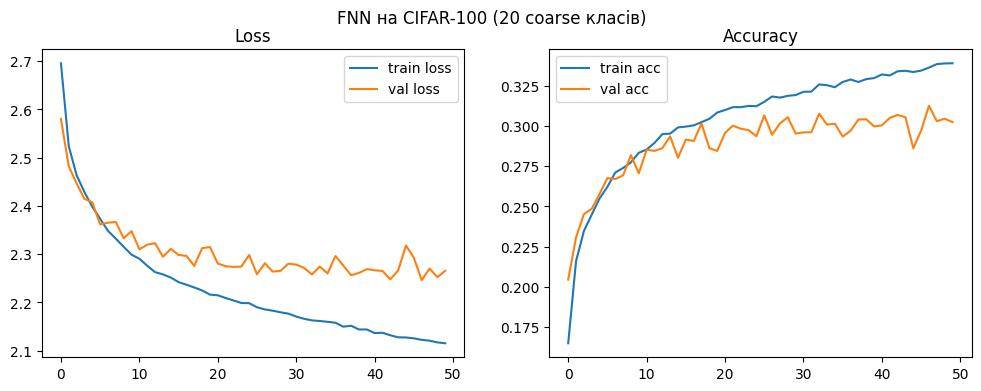

Оцінка FNN на тесті:
313/313 - 1s - 3ms/step - accuracy: 0.2965 - loss: 2.2759
[2.275930881500244, 0.29649999737739563]


In [ ]:
# FNN модель з рег
fnn_model_no_reg = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(32, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(n_classes, activation="softmax")
])

print("=== Навчання FNN ===")
hist_fnn = train_model(fnn_model_no_reg, epochs=50, batch_size=64)
plot_history(hist_fnn, "FNN на CIFAR-100 (20 coarse класів)")
fnn_model_no_reg.save('fnn_model_no_reg.keras')

print("Оцінка FNN на тесті:")
print(fnn_model_no_reg.evaluate(x_test, y_test, verbose=2))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


=== Навчання FNN ===
Epoch 1/50
625/625 - 7s - 11ms/step - accuracy: 0.0993 - loss: 2.8726 - val_accuracy: 0.1570 - val_loss: 2.7087
Epoch 2/50
625/625 - 2s - 3ms/step - accuracy: 0.1388 - loss: 2.7378 - val_accuracy: 0.1736 - val_loss: 2.6451
Epoch 3/50
625/625 - 3s - 4ms/step - accuracy: 0.1493 - loss: 2.7003 - val_accuracy: 0.1772 - val_loss: 2.6094
Epoch 4/50
625/625 - 2s - 3ms/step - accuracy: 0.1552 - loss: 2.6795 - val_accuracy: 0.1944 - val_loss: 2.6052
Epoch 5/50
625/625 - 3s - 5ms/step - accuracy: 0.1584 - loss: 2.6657 - val_accuracy: 0.1705 - val_loss: 2.6165
Epoch 6/50
625/625 - 2s - 3ms/step - accuracy: 0.1667 - loss: 2.6460 - val_accuracy: 0.1957 - val_loss: 2.5657
Epoch 7/50
625/625 - 3s - 4ms/step - accuracy: 0.1744 - loss: 2.6292 - val_accuracy: 0.2025 - val_loss: 2.5571
Epoch 8/50
625/625 - 2s - 4ms/step - accuracy: 0.1828 - loss: 2.6152 - val_accuracy: 0.2084 - val_loss: 2.5332
Epoch 9/50
625/625 - 2s - 3ms/step - accuracy: 0.1817 - loss: 2.6099 - val_accuracy: 0.205

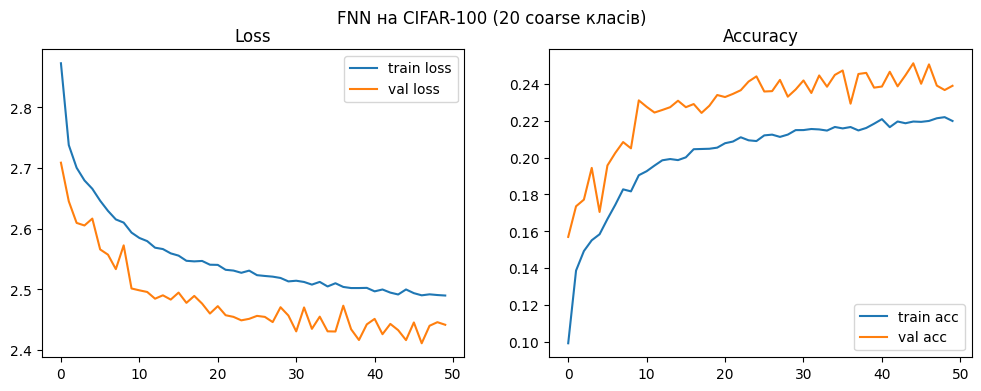

Оцінка FNN на тесті:
313/313 - 1s - 5ms/step - accuracy: 0.2355 - loss: 2.4427
[2.4427225589752197, 0.23549999296665192]


In [ ]:
# FNN модель з рег
def build_fnn_reg(input_shape=(64,64,3), n_classes=20, l2=1e-5):
    fnn_model_reg = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(32, activation="relu", kernel_regularizer=regularizers.l2(l2)),
        layers.Dropout(0.15),
        layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(l2)),
        layers.Dropout(0.15),
        layers.Dense(64, activation="relu"),
        layers.Dense(n_classes, activation="softmax")
    ])
    return fnn_model_reg

print("=== Навчання FNN ===")
fnn_model_reg = build_fnn_reg()
hist_fnn = train_model(fnn_model_reg, epochs=50, batch_size=64)
plot_history(hist_fnn, "FNN на CIFAR-100 (20 coarse класів)")
fnn_model_reg.save('fnn_model_reg.keras')

print("Оцінка FNN на тесті:")
print(fnn_model_reg.evaluate(x_test, y_test, verbose=2))

In [ ]:
fnn_model_reg.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │        98,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 20)             │         1,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 317,726 (1.21 MB)

 Trainable params: 105,908 (413.70 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 211,818 (827.42 KB)

=== Навчання та оцінка FNN ===

=== Запуск 1/5 ===


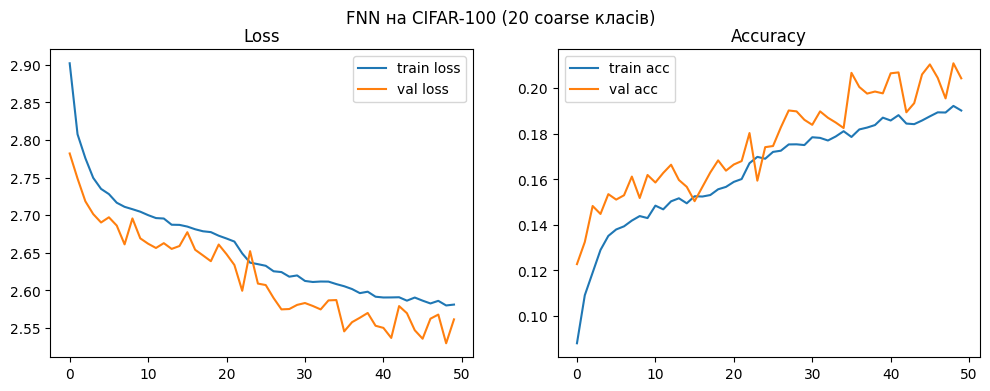

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1960 - loss: 2.5671
Test accuracy: 0.1993, Test error: 0.8007

=== Запуск 2/5 ===


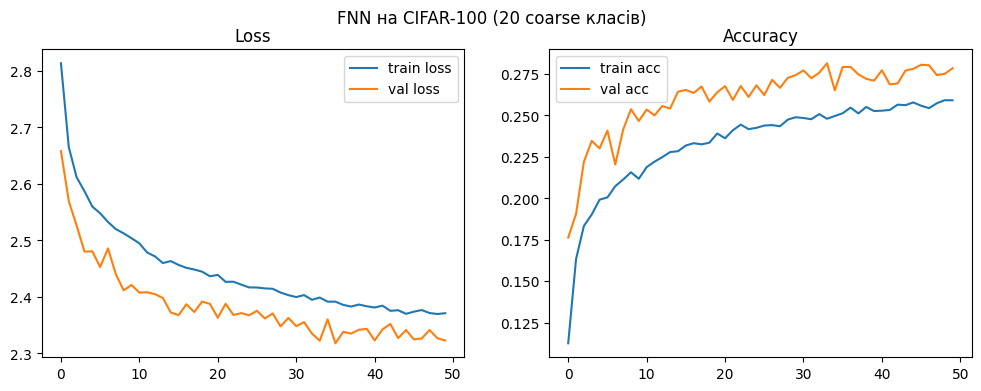

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2688 - loss: 2.3386
Test accuracy: 0.2715, Test error: 0.7285

=== Запуск 3/5 ===


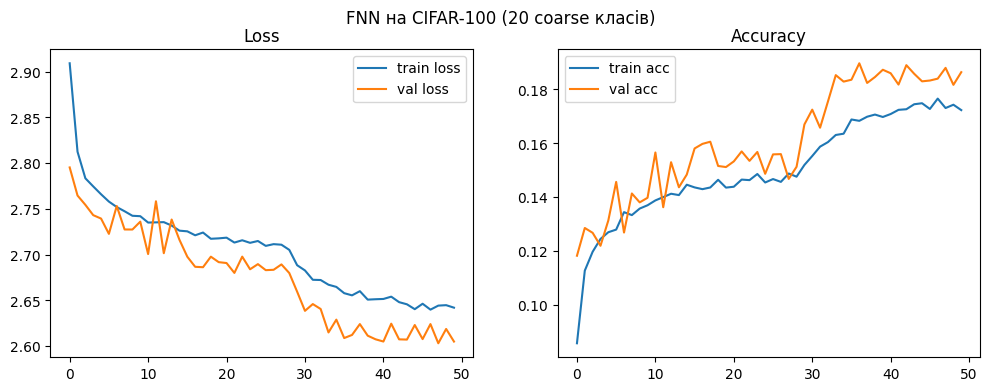

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1819 - loss: 2.6125
Test accuracy: 0.1853, Test error: 0.8147

=== Запуск 4/5 ===


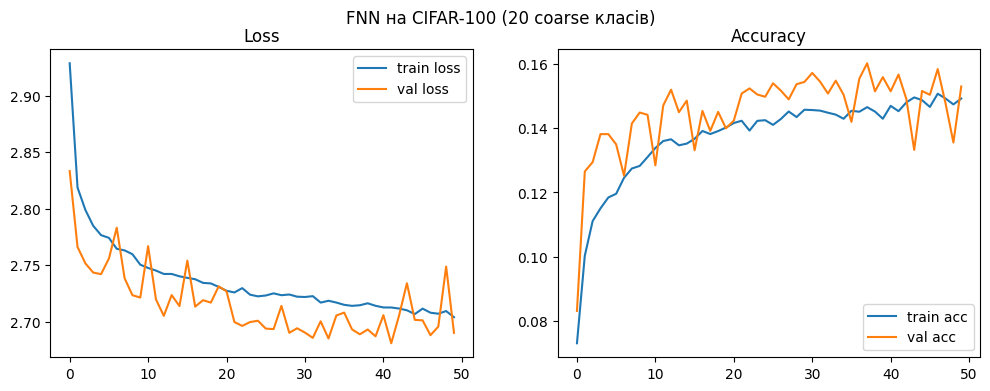

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1502 - loss: 2.6976
Test accuracy: 0.1528, Test error: 0.8472

=== Запуск 5/5 ===


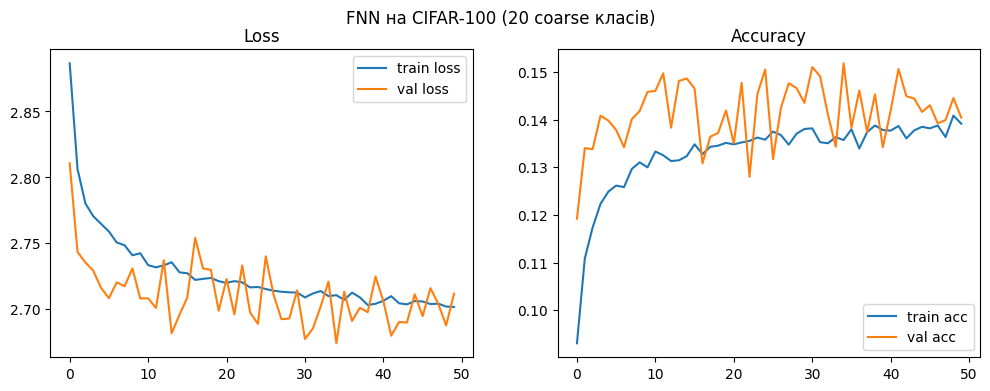

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1439 - loss: 2.7054
Test accuracy: 0.1407, Test error: 0.8593


NameError: name 'np' is not defined

In [ ]:
# Навчання моделей
def train_model(model, epochs=50, batch_size=64, verbose=2):
    model.compile(
        optimizer=keras.optimizers.Adam(5e-4),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        x_train, y_train,
        validation_data=(x_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        verbose=verbose
    )
    return history

# FNN модель з рег
def build_fnn_reg(input_shape=(64,64,3), n_classes=20, l2=1e-5):
    fnn_model_reg = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(32, activation="relu", kernel_regularizer=regularizers.l2(l2)),
        layers.Dropout(0.15),
        layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(l2)),
        layers.Dropout(0.15),
        layers.Dense(64, activation="relu"),
        layers.Dense(n_classes, activation="softmax")
    ])
    return fnn_model_reg

# === Функція оцінки bias/variance ===
def evaluate_bias_variance(build_fn, runs=5, epochs=50, batch_size=64):
    errors = []

    for i in range(runs):
        print(f"\n=== Запуск {i+1}/{runs} ===")
        model = build_fn()
        hist = train_model(model, epochs=epochs, batch_size=batch_size, verbose=0)
        plot_history(hist, "FNN на CIFAR-100 (20 coarse класів)")
        loss, acc = model.evaluate(x_test, y_test)
        errors.append(1 - acc)
        print(f"Test accuracy: {acc:.4f}, Test error: {1-acc:.4f}")

    errors = np.array(errors)
    bias2 = (errors.mean() - 0.0)**2  # ідеальна помилка = 0
    variance = errors.var()
    total_error = bias2 + variance

    print("\n=== Bias-Variance decomposition ===")
    print(f"Bias²: {bias2:.6f}")
    print(f"Variance: {variance:.6f}")
    print(f"Total error ≈ Bias² + Variance = {total_error:.6f}")

    return errors, bias2, variance, total_error

# === Запуск для FNN ===
print("=== Навчання та оцінка FNN ===")
errors, bias2, variance, total_error = evaluate_bias_variance(build_fnn_reg, runs=5, epochs=50, batch_size=64)

fnn_model_reg.save('fnn_model_reg.keras')